# Introduction to Matplotlib

The **Matplotlib** package can be used to make scientific-grade plots. You can import it with:

In [2]:
import matplotlib.pyplot as plt

If you are using IPython and you want to make interactive plots, you can start up IPython with:

    ipython --matplotlib

If you now type a plotting command, an interactive plot will pop up.

If you use the IPython notebook, add a cell containing:

In [2]:
%matplotlib inline

and the plots will appear inside the notebook.

## Basic plotting

The main plotting function is called ``plot``:

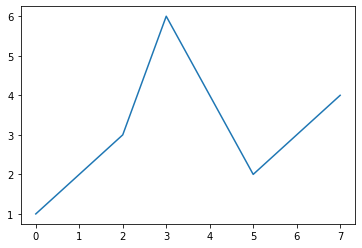

In [2]:
plt.plot([1,2,3,6,4,2,3,4])

In the above example, we only gave a single list, so it will assume the x values are the indices of the list/array.

However, we can instead specify the x values:

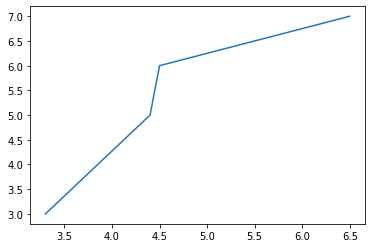

In [3]:
plt.plot([3.3, 4.4, 4.5, 6.5], [3., 5., 6., 7.])

Matplotlib can take Numpy arrays, so we can do for example:

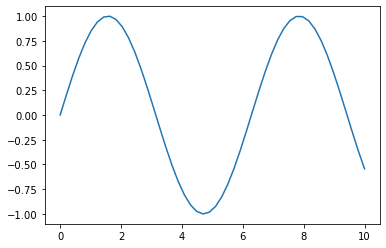

In [4]:
import numpy as np
x = np.linspace(0., 10., 50)
y = np.sin(x)
plt.plot(x, y)

The ``plot`` function is actually quite complex, and for example can take arguments specifying the type of point, the color of the line, and the width of the line:

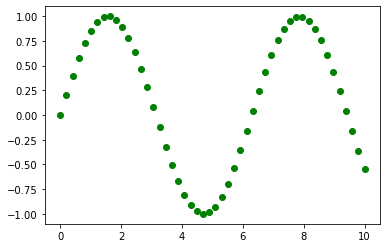

In [16]:
plt.plot(x, y, marker='o', color='green', linewidth=0)

plt.plot(x, y, 'o', color='k')

The line can be hidden with:

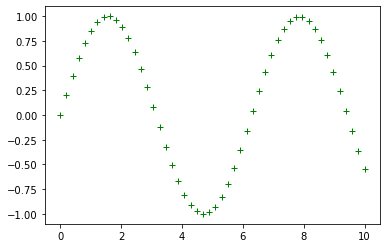

In [19]:
plt.plot(x, y,linewidth=0, color='green',  marker='+')

If you are interested, you can specify some of these attributes with a special syntax, which you can read up more about in the Matplotlib documentation:

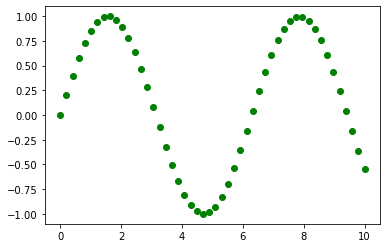

In [8]:
plt.plot(x, y, 'go')  # means green and circles

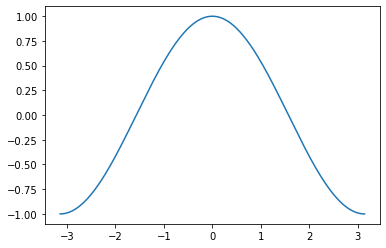

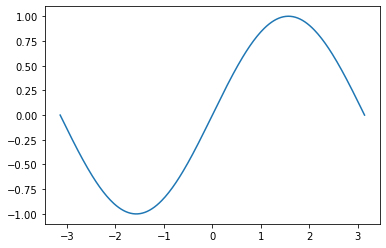

<Figure size 432x288 with 0 Axes>

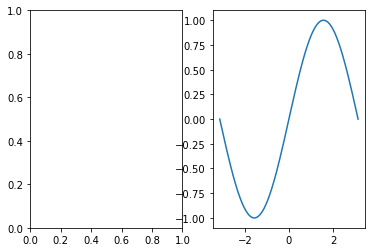

In [25]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C)

plt.figure()
plt.plot(X, S)

fig = plt.figure()
ax = fig.axes

fig, ax = plt.subplots(1, 2)
ax[1].plot(X, S)

## Exercise

We start off by loading the ``data/SIMAR_gaps.txt`` file which we encountered in the Numpy lecture:

In [ ]:
data = np.loadtxt('')

In [3]:
# The following code reads in the file and removes bad values
import numpy as np
data = np.loadtxt('data/SIMAR_gaps.txt', skiprows=1)
Hm0 = data[:, 4]
keep = Hm0 > -99.9
data = data[keep]
Hm0 = data[:, 4]

Now that the data has been read in, plot the Hm0:

(1.0, 1.5)

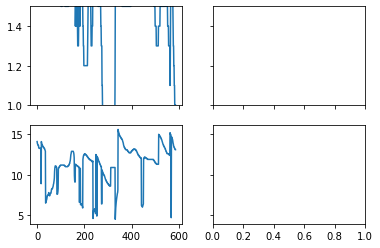

In [4]:
# your solution here
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row')
axs[0, 0].plot(Hm0)
axs[1, 0].plot(data[:, 6])
axs[0, 0].set_ylim([1, 1.5])

0
1


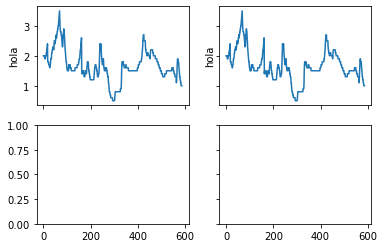

In [20]:
fig, axs1 = plt.subplots(2, 2, sharex='col', sharey='row')
# axs = [[ax0, ax1], [ax2, ax3]]
# 1 plot axs[0, 0]

axs = fig.axes
# axs = [ax0, ax1, ax2, ax3]
# 1 plot axs[0]

for ii, hi in enumerate([Hm0, Hm0]):
    print(ii)

label = ['hola', 'hola']
for ii, hi in enumerate([Hm0, Hm0]):
    axs[ii].plot(hi)
    axs[ii].set_ylabel(label[ii])


In [9]:
axs

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

## Customizing plots

Text(0, 0.5, 'y values')

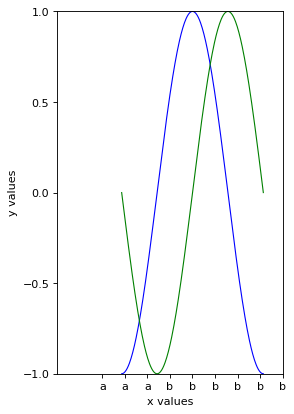

In [19]:
# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 2, 1)

X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-", label='cosine')

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-", label='sine')

# Set x limits
plt.xlim(-6.0, 4) # plt.xlim(-4)

# Set x ticks
plt.xticks(np.linspace(-4, 4, 9), ['a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b'])

# Set y limits
plt.ylim(-1.0, 1.0)

# Set y ticks
plt.yticks(np.linspace(-1, 1, 5))


plt.xlabel('x values')
plt.ylabel('y values')

# ax.set_xlabel()


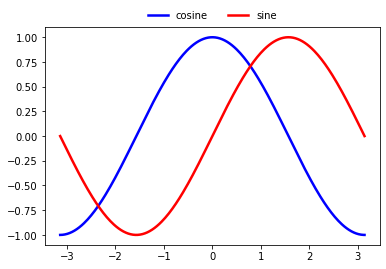

In [29]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")

plt.legend(loc='lower center', bbox_to_anchor=(0.5, 0.99), ncol=2, frameon=False) # upper center lower / left right

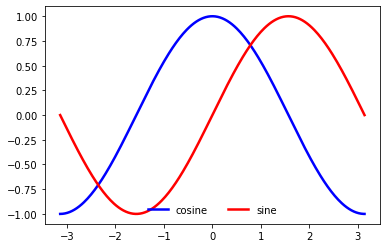

In [36]:
h1 = plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
h2 = plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

plt.legend(['cosine', 'sine'], loc='lower center', ncol=2, frameon=False) # upper center lower / left right

## Other types of plots

<center> <img src="img/matplotlib_ex.png" width="1600"/> </center>

### Scatter plots

While the ``plot`` function can be used to show scatter plots, it is mainly used for line plots, and the ``scatter`` function is more often used for scatter plots, because it allows more fine control of the markers:

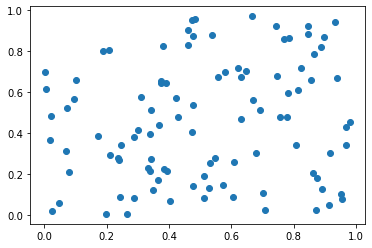

In [37]:
x = np.random.random(100)
y = np.random.random(100)
plt.scatter(x, y)
# ax.scatter()

### Errorbar

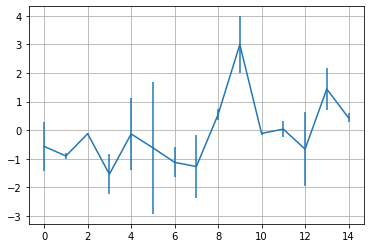

In [53]:
###  generate some random data
xdata2 = np.arange(15)
ydata2 = np.random.randn(15)
yerrors = np.random.randn(15)

###  initialize the figure
fig, ax = plt.subplots()

ax.errorbar(xdata2, ydata2, yerr=yerrors)
ax.grid()
# ax.grid(color='royalblue', linewidth=5)

<ErrorbarContainer object of 3 artists>

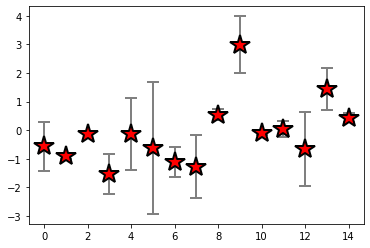

In [55]:
plt.errorbar(xdata2, ydata2, yerr=yerrors, ls='',         # no lines connecting points
             elinewidth=2,  # error line width
                                               ecolor='gray', # error color
                                               marker='*',    # circular plot symbols
                                               ms=20,         # markersize
                                               mfc='r',       # marker face color
                                               mew=2,         # marker edge width
                                               mec='k',       # marker edge color
                                
                                               capsize=6)     # error hat sizex

### Histograms

Histograms are easy to plot using the ``hist`` function:

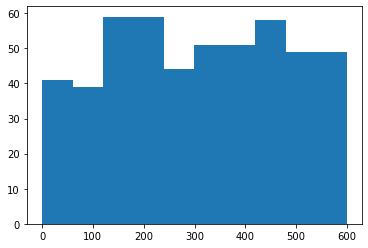

In [68]:
v = np.random.uniform(0., 600., 500)
h = plt.hist(v, bins=10)  # we do h= to capture the output of the function, but we don't use it

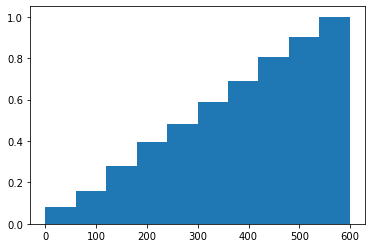

In [71]:
h = plt.hist(v, bins='auto', density=True, cumulative=True)  

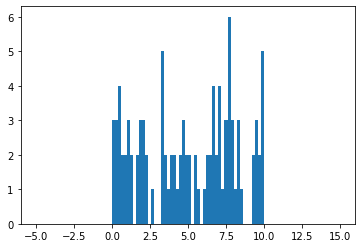

In [18]:
h = plt.hist(v, range=[-5., 15.], bins=100)

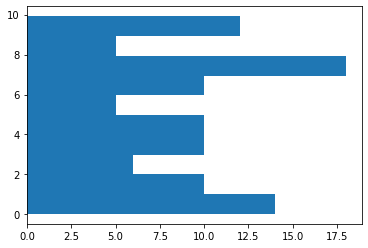

In [19]:
h = plt.hist(v, orientation='horizontal')

### Images

You can also show two-dimensional arrays with the ``imshow`` function:

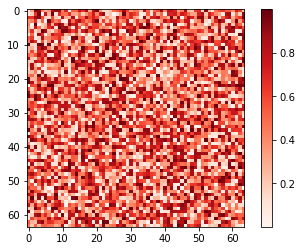

In [76]:
array = np.random.random((64, 64))
plt.imshow(array, cmap='Reds')
plt.colorbar()

And the colormap can be changed:

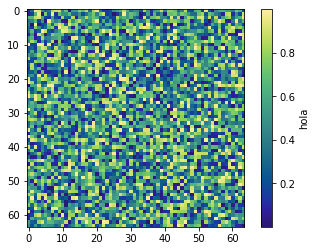

In [81]:
import cmocean as cmo
plt.imshow(array, cmap=cmo.cm.haline)
plt.colorbar(label='hola')

### Contour

256
(256, 256)


<ipython-input-91-4da0a4d7f53f>:18: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)


<a list of 9 text.Text objects>

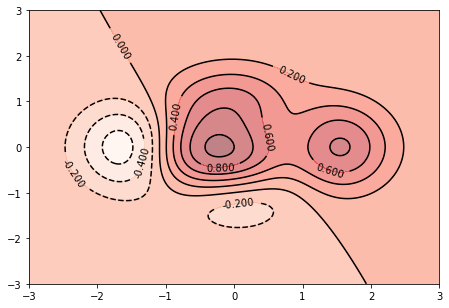

In [91]:
def f(x,y):
    return (1 - x / 2 + x**5 + y**3) * np.exp(-x**2 -y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)

z = f(x, y)
print(z.size)

Z = f(X, Y)
print(Z.shape)

plt.axes([0.025, 0.025, 0.95, 0.95])

plt.contourf(X, Y, f(X, Y), 8, alpha=.5, cmap='Reds')
C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)
plt.clabel(C, inline=1, fontsize=10)

#plt.xticks([])
#plt.yticks([])
#plt.show()

### Polar plots

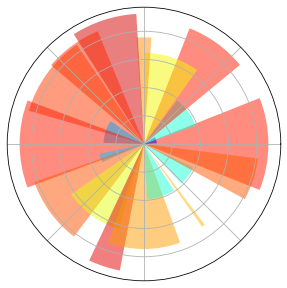

In [96]:
ax = plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)

N = 20
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
radii = 10 * np.random.rand(N)
width = np.pi / 4* np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r/10.))
    bar.set_alpha(0.5)


ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

### Multiplots

Text(0.5, 1.0, 'Simple plot')

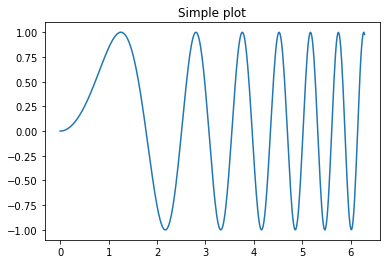

In [24]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

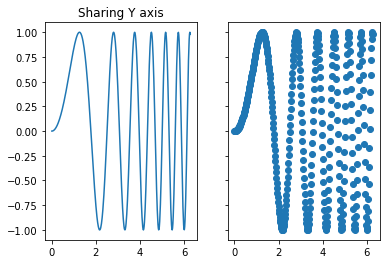

In [25]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

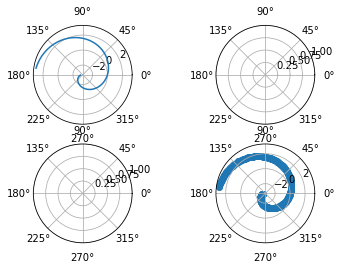

In [98]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

(<Figure size 432x288 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

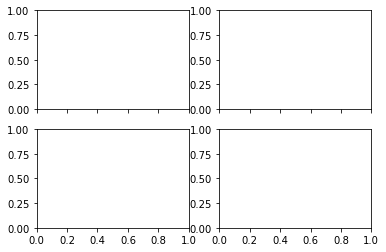

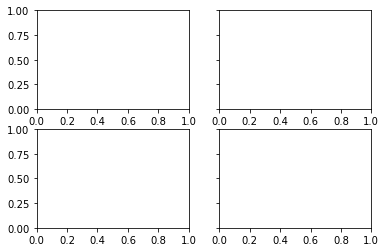

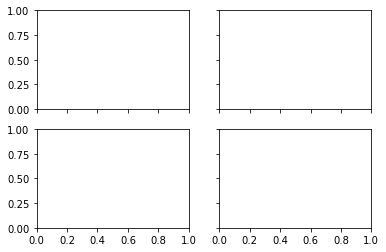

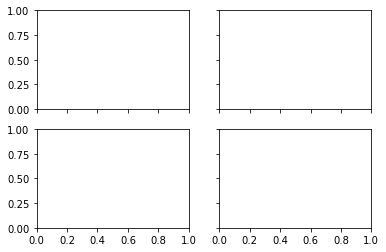

In [27]:
# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

## Saving plots to files

To save a plot to a file, you can do for example:

In [28]:
plt.savefig('my_plot.png', bbox_inches='tighth')
fig.savefig(dir_pics / 'my_plot.png')
fig.savefig('dir_pics/myplot.png')
# pdf, png, eps, 

<Figure size 432x288 with 0 Axes>

and you can then view the resulting file like you would iew a normal image. On Linux, you can also do:

    $ xv my_plot.png

in the terminal.

## Learning more

The easiest way to find out more about a function and available options is to use the ``?`` help in IPython:

        In [11]: plt.hist?

    Definition: plt.hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, **kwargs)
    Docstring:
    Plot a histogram.

    Call signature::

      hist(x, bins=10, range=None, normed=False, weights=None,
             cumulative=False, bottom=None, histtype='bar', align='mid',
             orientation='vertical', rwidth=None, log=False,
             color=None, label=None, stacked=False,
             **kwargs)

    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.

    etc.

But sometimes you don't even know how to make a specific type of plot, in which case you can look at the [Matplotlib Gallery](http://matplotlib.org/gallery.html) for example plots and scripts.


## Exercise

Use Numpy to make the histogram of Hm0 and make a histogram. Try changing the number of bins and try plotting the CDF on top of it.

(array([0.0306644 , 0.03747871, 0.08006814, 0.09710392, 0.10732538,
        0.13969336, 0.25042589, 0.44804089, 0.56218058, 0.70187394,
        0.74787053, 0.79897785, 0.8330494 , 0.89608177, 0.90971039,
        0.93526405, 0.96422487, 0.97785349, 0.9846678 , 0.99148211,
        0.99488927, 0.99659284, 1.        ]),
 array([0.5       , 0.63043478, 0.76086957, 0.89130435, 1.02173913,
        1.15217391, 1.2826087 , 1.41304348, 1.54347826, 1.67391304,
        1.80434783, 1.93478261, 2.06521739, 2.19565217, 2.32608696,
        2.45652174, 2.58695652, 2.7173913 , 2.84782609, 2.97826087,
        3.10869565, 3.23913043, 3.36956522, 3.5       ]),
 [<matplotlib.patches.Polygon at 0x7f9909012460>])

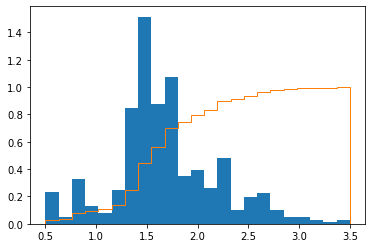

In [108]:

# your solution here
plt.figure()
plt.hist(Hm0, density=True, bins='auto')
plt.hist(Hm0, cumulative=True, density=True, bins='auto', histtype='step')

